In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from scipy.misc import derivative
import math

In [2]:
shaping_data = pd.read_csv(".\\Shaping_Machine.csv")
shaping_data

,Angle,Displacement,Velocity,Acceleration
0,0,0.0,3.8,0.0
1,30,1.9,3.4,-0.9
2,60,3.4,2.6,-2.1
3,90,4.4,1.0,-4.1
4,120,4.5,-1.5,-5.8
5,150,2.8,-4.5,-5.0
6,180,0.0,-6.1,0.0
7,210,-2.9,-4.5,5.2
8,240,-4.5,-1.5,5.8
9,270,-4.5,1.0,4.0


In [3]:
x_values = np.array(shaping_data["Angle"])
y_values = np.array(shaping_data["Displacement"])

# Theoretical Curve: $\frac{asin(\theta)}{b+cos(\theta)}$

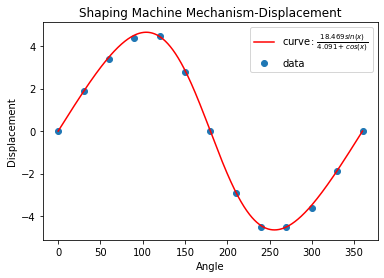

18.46934267243467 4.091084312056941


In [4]:
#Theoretical Curve (a>0 and b >1)
curve = lambda x,a,b : a*np.sin(np.radians(x)) / ( b+ np.cos(np.radians(x)))


#Non Linear Least Square cuve fitting using the trust riegion reflective algorithm(trf)
parameters, conv = op.curve_fit(
                                curve,
                                x_values,y_values,
                                method='trf',
                                bounds=(
                                    (0,1),          #(lowerbound for a (a>0), lowerbound for b (b>1))
                                    (np.inf,np.inf) #(Upperbounds for a and b)
                                )
                                )

#parameters hold the value for a and b

fitted_curve = lambda x : curve(x,*parameters) # displacement = f(angle)


########## Drawing the fitted Graph ###############

plt.scatter(x_values,y_values,label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = fitted_curve(x_data)
plt.plot(x_data,y_data,'r',label=f"curve: $\\frac{{{parameters[0]:0.3f}sin(x)}}{{{parameters[1]:0.3f}+cos(x)}}$")



plt.title("Shaping Machine Mechanism-Displacement")
plt.xlabel("Angle")
plt.ylabel("Displacement")
plt.legend()
plt.savefig("Shaping Machine Mechanism_Displacement.png")
plt.show()
print(*parameters)
###################################################


In [5]:
velocity_data = [derivative(fitted_curve,x,dx=1e-6,n = 1)*np.degrees(1) for x in x_values]
shaping_velocity = pd.DataFrame.from_dict({"Angle":x_values,"Experimental":shaping_data["Velocity"],"Theoretical":velocity_data})
shaping_velocity["Error"] = np.abs(shaping_velocity["Experimental"]-shaping_velocity["Theoretical"])
shaping_velocity

,Angle,Experimental,Theoretical,Error
0,0,3.8,3.627782,0.172218
1,30,3.4,3.414566,0.014566
2,60,2.6,2.668612,0.068612
3,90,1.0,1.103506,0.103506
4,120,-1.5,-1.497414,0.002586
5,150,-4.5,-4.515643,0.015643
6,180,-6.1,-5.975037,0.124963
7,210,-4.5,-4.515643,0.015643
8,240,-1.5,-1.497414,0.002586
9,270,1.0,1.103506,0.103506


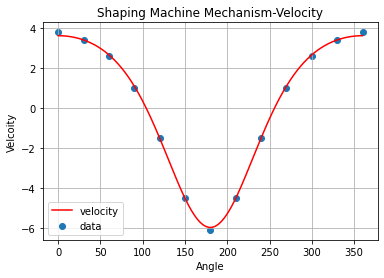

In [6]:
plt.scatter(x_values,shaping_data["Velocity"],label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = np.array([derivative(fitted_curve,x,dx=1e-6,n = 1)*np.degrees(1) for x in x_data])
plt.plot(x_data,y_data,'r',label=f"velocity")
plt.grid()
plt.title("Shaping Machine Mechanism-Velocity")
plt.xlabel("Angle")
plt.ylabel("Velcoity")
plt.legend()
plt.savefig("Shaping Machine Mechanism_Velocity.png")
plt.show()

In [7]:
#Accelereation
#Finding the theoretical Derivateves at the data points
acceleration_data = [derivative(fitted_curve,x,dx=1e-3,n = 2)*np.degrees(1)*np.degrees(1) for x in x_values]
shaping_acceleration = pd.DataFrame.from_dict({"Angle":x_values,"Experimental":shaping_data["Velocity"],"Theoretical":velocity_data})
shaping_acceleration["Error"] = np.abs(shaping_acceleration["Experimental"]-shaping_acceleration["Theoretical"])
shaping_acceleration

,Angle,Experimental,Theoretical,Error
0,0,3.8,3.627782,0.172218
1,30,3.4,3.414566,0.014566
2,60,2.6,2.668612,0.068612
3,90,1.0,1.103506,0.103506
4,120,-1.5,-1.497414,0.002586
5,150,-4.5,-4.515643,0.015643
6,180,-6.1,-5.975037,0.124963
7,210,-4.5,-4.515643,0.015643
8,240,-1.5,-1.497414,0.002586
9,270,1.0,1.103506,0.103506


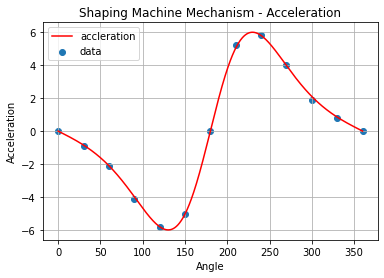

In [8]:
plt.scatter(x_values,shaping_data["Acceleration"],label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = np.array([derivative(fitted_curve,x,dx=1e-3,n = 2)*np.degrees(1)*np.degrees(1) for x in x_data])
plt.plot(x_data,y_data,'r',label=f"accleration")
plt.title("Shaping Machine Mechanism - Acceleration")
plt.xlabel("Angle")
plt.ylabel("Acceleration")
plt.grid()
plt.legend()
plt.savefig("Shaping Machine Mechanism_Acceleration.png")
plt.show()